<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento
**Entrada:** arreglo con n elementos numéricos. $[a_1, a_2, ... a_n]$

**Salida:** arreglo con los mismos elementos ordenados de menor a mayor. $[a_1', a_2', ... a_n']$ tal que $a_i'\leq a_{i+1}'$ para todo $ 0 \leq i < n$

Comp siempre estamos buscando algoritmos que minimizen el tiempo de ejecución necesario para resolver el problema de ordenar un arreglo, analizar el algoritmo recursivo **QuickSort** es bastante útil ya que como lo dice su nombre, es bastante rápido al momento de ordenar el arreglo.

La función por si misma no hace más que llamar a la función **Partition**, la verdadera estrella del show, y luego se llama recursivamente, por lo que examinaremos a **Partition** primero.

#2.Partition

A continuación se incluye una implementación de **Partition**

#2.1 Código

In [35]:
import random


def MedianFromSample(array,start,end):
  sample = random.sample(range(start,end),3)
  global comparaciones
  if array[sample[0]]>= array[sample[1]] and array[sample[0]]<= array[sample[2]]:
    comparaciones += 2
    return sample[0]
  if array[sample[0]]>= array[sample[2]] and array[sample[0]]<= array[sample[1]]:
    comparaciones += 2
    return sample[0]
  if array[sample[1]]>= array[sample[0]] and array[sample[1]]<= array[sample[2]]:
    comparaciones += 2
    return sample[1]
  if array[sample[1]]>= array[sample[2]] and array[sample[1]]<= array[sample[0]]:
    comparaciones += 2
    return sample[1]
  else:
    return sample[2]



def Partition(array, start, end, method):
  if start>=end: return start
  global comparaciones
  if method==0:
    pivot = array[start]
    array[start]= array[end-1]
    array[end-1]=pivot
  elif method ==1 and end-start>=3:
    median = MedianFromSample(array,start,end)
    pivot = array[median]
    array[median] = array[end-1]
    array[end-1]=pivot
  else:
    pivot=array[end-1]
  i,j = start, start
  while j < end-1:
    comparaciones +=1
    if array[j] >= pivot:
      j=j+1
    else:
      aux = array[j]
      array[j]=array[i]
      array[i]= aux
      i=i+1
      j=j+1
  array[end-1]=array[i]
  array[i]=pivot
  return i

comparaciones = 0
print("método con pivote inicial")
a = random.sample(range(0, 40), 10)
print(a)
s = Partition(a,0,len(a),0)
print(a)
print("pivote", a[s], "en posición", s,",",comparaciones,"comparaciones\n")

comparaciones = 0
print("método con pivote mediana aleatoria")
a = random.sample(range(0, 40), 10)
print(a)
s = Partition(a,0,len(a),1)
print(a)
print("pivote", a[s], "en posición", s,",",comparaciones,"comparaciones\n")

comparaciones = 0
print("método con pivote final")
a = random.sample(range(0,40), 10)
print(a)
s = Partition(a,0,len(a),2)
print(a)
print("pivote", a[s], "en posición", s,",",comparaciones,"comparaciones")

método con pivote inicial
[39, 17, 9, 2, 3, 18, 21, 29, 13, 11]
[11, 17, 9, 2, 3, 18, 21, 29, 13, 39]
pivote 39 en posición 9 , 9 comparaciones

método con pivote mediana aleatoria
[34, 10, 18, 39, 9, 36, 30, 29, 20, 11]
[10, 18, 9, 11, 20, 29, 30, 39, 34, 36]
pivote 29 en posición 5 , 9 comparaciones

método con pivote final
[24, 16, 6, 9, 31, 37, 39, 7, 18, 12]
[6, 9, 7, 12, 31, 37, 39, 24, 18, 16]
pivote 12 en posición 3 , 9 comparaciones


#2.2 Descripción del algoritmo

El algoritmo recibe como entrada a un arreglo `array` y a dos índices `start` y `end`, que marcan el inicio y final del subarreglo que queremos particionar. También va a recibir una variable `method` que indique cómo se seleccione al elemento pivote.

1. En primer lugar, si el subarreglo es vacío o de un elemento, no se hace nada. Se retorna `start` como si fuera pivote.
2. Según el valor de `method`, elegimos un valor pivote `pivot`.
  
  -Si `method == 0`, elegimos al primer elemento del arreglo como pivote, y lo intercambiamos con el elemento del final `(array[end-1])`.

  -Si `method == 1`, elegimos tres valores del arreglo al azar, escogemos a la mediana de estos como pivote, y lo intercambiamos con el elemento del final, en la posición `end-1`. Si no hay tres valores para escoger, se pasa al siguiente caso. (note que en la función que elige mediana de una muestra aleatoria, se realizan comparaciones extras.)

  -En todo otro caso, elegimos al ultimo elemento del arreglo como pivote, manteniendo su posición en `end-1`.

3. Definimos a dos índices, `i` y `j` con valores `start`, que definirán los subarreglos de elementos menores y mayores al pivote. Empezamos a iterar desde el inicio del subarreglo, considerando `j` como nuestro iterador.
4. Comparamos `array[j]` con `pivot`. Si es mayor, aumentamos el valor de `j` por 1, manteniendo este elemento en la zona de valores mayores a pivote. Si es menor, intercambiamos el elemento en `j` por el que está en `i` y aumentamos tanto `i` y `j` por 1, dejando pues al elemento comparado en la zona de valores menores.
5. Una vez `j` llega al pivote en `end-1`., se concluye. remplazando al elemento en el pivote por el que está en `i`.
6. Quedamos con el arreglo particionado. Retornamos el valor del índice donde quedó el pivote, osea, `i`.

##2.3 Ejemplo

Para explicar el funcionamiento, aqui se presenta un ejemplo de la función **Partition**, usando el método con pivote a partir de la mediana de 3 elementos.

Digamos que tenemos al siguiente arreglo como entrada.
$X=[3, 9, 5, 0, 1, 7, 6]$

Primero, llamaremos a la función MedianFromSample. Esta va a escoger tres elementos aleatorios y retornará la mediana de estos.

$Sample = [5,0,7]; Median = 5$

Este $5$ será nuestro pivote y lo pondremos al final, intercambiando elementos de posición.

$X=[3, 9, 6, 0, 1, 7, 5]$

Ya que estamos analizando todo el arreglo, $i$ y $j$ parten desde $0$.

$X[j] = 3 < 5$, por lo tanto se intercambian $X[i]$ y $X[j]$, pero como por ahora son iguales, no hay cambio. $i$ y $j$ aumentan por $1$.

$X=[3, 9, 6, 0, 1, 7, 5]; i=1,j=1; $

$X[j] = 9 > 5$, solo aumenta $j$.

$X=[3, 9, 6, 0, 1, 7, 5]; i=1,j=2; $

$X[j] = 6 > 5$, nuevamente solo aumenta $j$.

$X=[3, 9, 6, 0, 1, 7, 5]; i=1,j=3; $

$X[j] = 0 < 5$, se intercambian $X[i]$ y $X[j]$, en este caso, $9$ y $0$. $i$ y $j$ aumentan.

$X=[3, 0, 6, 9, 1, 7, 5]; i=2,j=4; $

$X[j] = 1 < 5$, se intercambian $X[i]$ y $X[j]$, $6$ y $1$ respectivamente. $i$ y $j$ aumentan.

$X=[3, 0, 1, 9, 6, 7, 5]; i=3,j=5; $

$X[j] = 7 > 5$, solo aumenta $j$.

$X=[3, 0, 1, 9, 6, 7, 5]; i=3,j=6; $

Ya que $j = len(X) -1$ hemos llegado al pivote, por lo que intercambiamos a éste con el que se encuentra en $X[i]$

$X=[3, 0, 1, 5, 6, 7, 9]; i=3,j=6; $

Y finalmente retornamos la posición donde quedó el pivote, que es $i = 3$.

#3. QuickSort

Ya definido **Partition**, podemos implementar a **QuickSort**.

##3.1 Código

In [32]:
def QuickSort(array,start,end,method,verbose=False):
  if start+1<end:
    if verbose: print("Arreglo a particionar:", array[start:end])
    pivot = Partition(array,start,end,method)
    if verbose: print("Arreglo particionado:", array[start:end], ", pivote:", array[pivot], "en posición", pivot)
    if verbose: print("Llamada recursiva de Quicksort para subarreglo izquierdo", array[start:pivot])
    QuickSort(array,start,pivot,method, verbose)
    if verbose: print("Llamada recursiva de Quicksort para subarreglo derecho", array[pivot+1:end])
    QuickSort(array,pivot+1,end,method, verbose)
  else:
    if verbose: print("Llamando a QuickSort con arreglo vacío o unitario.")

comparaciones = 0
a = random.sample(range(0, 40), 10)
print(a)
QuickSort(a,0,len(a),1,False)
print(a)
print("Comparaciones:", comparaciones)

[36, 11, 10, 33, 26, 20, 15, 27, 29, 8]
[8, 10, 11, 15, 20, 26, 27, 29, 33, 36]
Comparaciones: 25


##3.2 Descripción del algoritmo

El algoritmo **QuickSort** recibe como entrada al arreglo `array` junto a 2 índices que indican inicio y final del subarreglo a ordenar, `start` y `end`. También recibe a variable `method`, la cual se usa al llamar a **Partition** para definir como elige pivote, y también una variable `verbose` que permite imprimir en pantalla el funcionamiento del algoritmo.

1. Primero, se chequea que el subarreglo definido por `start` y `end` tenga más de 1 elemento. Si este no es el caso, entonces no hace nada. (no hay retorno).
2. Se llama **Partition**, pasándole todos los parametros necesarios y guardando el pivote que retorna en `pivot`.
3. Se llama recursivamente a **QuickSort** para el subarreglo a la izquierda del pivote, es decir, `array[start:pivot]`.
4. Finalmente, se llama recursivamente a **QuickSort** para el subarreglo a la derecha,`array[pivot+1:end]`.

##3.3 Ejemplo
A modo de ejemplo, digamos que queremos ordenar al siguiente arreglo con **QuickSort**, usando el método de **Partition** que elige pivote al final.

$A = [6, 2, 1, 5, 3, 4]$

Tomando a $4$ como pivote, **Partition** dejará al arreglo de la siguiente forma.

$A = [2, 1, 3, 4, 6, 5]$

Luego, se llamará recursivamente a **QuickSort** con el subarreglo que está a la izquierda de pivote y el que está a la derecha:

$B_1 = [2,1,3] ; B_2 = [6,5]$

Luego, se Particiona. Para $B_1$, el pivote será $3$, el cual es mayor que el resto por lo que el arreglo queda igual.  Para $B_2$, el pivote es $5$, y cambia de lugar con $6$.

$B1=[2,1,3];B2=[5,6]$

(Luego de esto, el arreglo original queda así: $A = [2, 1, 3, 4, 5, 6]$)

Se llamará de nuevo a **QuickSort** con los subarreglos adyacentes a pivotes. Note que como los pivotes quedaron en extremos, algunos arreglos laterales quedaron vacíos.

$C_1 = [2,1], C_2 = [ ], C_3 = [ ], C_4 = [6]$

Cuando el arreglo es vacío o solo de un elemento, **QuickSort** no hace nada. Solo $C_1$ se particiona, con pivote $1$. $1$ y $2$ intercambian de lugar.

$C_1= [1,2], (A = [1,2, 3, 4, 6, 5])$

Finalmente se vuelve a llamar a Quicksort, pero como los subarreglos con lo que lo llama son de uno o cero elementos, no realiza nada.

Finalmente quedamos con el arreglo ordenado de menor a mayor.

$A = [2, 1, 3, 4, 6, 5]$


##3.4 Ejecución paso a paso (`verbose=True`)

A continuación se expone como funciona **QuickSort** paso a paso usando la variable `verbose`.

In [ ]:
comparaciones = 0
a = random.sample(range(0, 15), 7)
print(a)
QuickSort(a,0,len(a),1,True)
print(a)
print("Comparaciones:", comparaciones)

[3, 1, 4, 9, 2, 5, 14]
Arreglo a particionar: [3, 1, 4, 9, 2, 5, 14]
Arreglo particionado: [3, 1, 4, 2, 5, 14, 9] , pivote: 5 en posición 4
Llamada recursiva de Quicksort para subarreglo izquierdo [3, 1, 4, 2]
Arreglo a particionar: [3, 1, 4, 2]
Arreglo particionado: [1, 2, 4, 3] , pivote: 2 en posición 1
Llamada recursiva de Quicksort para subarreglo izquierdo [1]
Llamando a QuickSort con arreglo vacío o unitario.
Llamada recursiva de Quicksort para subarreglo derecho [4, 3]
Arreglo a particionar: [4, 3]
Arreglo particionado: [3, 4] , pivote: 3 en posición 2
Llamada recursiva de Quicksort para subarreglo izquierdo []
Llamando a QuickSort con arreglo vacío o unitario.
Llamada recursiva de Quicksort para subarreglo derecho [4]
Llamando a QuickSort con arreglo vacío o unitario.
Llamada recursiva de Quicksort para subarreglo derecho [14, 9]
Arreglo a particionar: [14, 9]
Arreglo particionado: [9, 14] , pivote: 9 en posición 5
Llamada recursiva de Quicksort para subarreglo izquierdo []
Lla

#4. Correctitud
Primero, debemos probar la correctitud de **Partition**, la función que más trabajo hace a la hora de ordenar.

##4.1 Correctitud de Partition

### **Teorema (Correctitud)**

*El algoritmo **Partition** recibe un arreglo o subarreglo definido por $array[start,end]$, elige un elemento como pivote, y particiona al arreglo, dejando en la mitad izquierda elementos menores al pivote, y en la mitad derecha elementos mayores, con el pivote colocado entre medio y retornando su posición.*

# Prueba del Teorema

Probaremos pues la siguiente **propiedad invariante del bucle** para **Partition**, y consideraremos un iterador $k$:

>Al inicio de cada iteración $k$, el subarreglo definido por $array[start:i]$ solo tiene elementos menores al pivote, y el arreglo definido por $array[i:j]$ contiene elementos mayores al pivote, con $i,j=>k$.

**Inicialización:**
Antes de empezar a iterar, $i$ y $j$ son iguales a $start$, por lo tanto los subarreglos mencionados en la propiedad invariante se encuentran vacíos, por lo tanto es trivialmente cierto que son menores o mayores a pivote, al no haber elementos.

**Mantención:**

Aplicando inducción, probaremos que si se cumple la propiedad para un cierta iteración de $k$, entonces también se cumple para la siguiente iteración $k+1$.

compararemos el valor de $array[k+1]$ con el valor pivote. en base al resultado, se presentan 2 casos.
1. Si $array[k+1]>= pivote$, entonces $j$ aumenta de valor, siendo igual a $k+1$. Como se cumplía la propiedad anterior, entonces $array[i:j]$ continúa representando un subarreglo con elementos mayores a pivote.
2. Si $array[k+1] < pivote$, este es intercambiado por el elemento $array[i]$, que, estando dentro de $array[i:j]$, es mayor a pivote.
Luego como a $i$ le sumamos $1$, $array[start:i]$ va a contener a este valor menor a pivote. También le sumamos $1$ a $j$, siendo este igual a $k+1$ ahora. Como el elemento que pusimos en $array[k+1]$ es mayor a pivote, se sigue cumpliendo que $array[i:j]$ sea el subarreglo con elementos mayores.

**Correctitud:**
Ya que las propiedades se mantienen durante el bucle, podemos decir que la propiedad invariante del bucle es correcta. Por lo tanto **Partition** es correcto.

Ojo que una vez termina el bucle, el pivote intercambia de lugar con el elemento en posición i, pero estando afuera del bucle esto no se considera para la propiedad invariante. 




##4.2 Correctitud de QuickSort


### **Teorema (Correctitud)**

*El algoritmo **QuickSort** recibe un arreglo de entrada $[a_1,a_2,...a_n]$, y lo ordena de menor a mayor: $[a_1',a_2',...,a_n']$ de modo que se cumpla $a_i'\leq a_{i+1}'$ para todo $ 0 \leq i < n$.*

##Prueba del Teorema
Usaremos inducción matemática para probar este teorema. Si llamamos a esta aseveración $P(n)$ para un arreglo de n elementos, entonces probaremos lo siguiente:

1. $P(1)$, el caso base. Claramente viendo el código, sabemos que esta propiedad se cumple para un arreglo de un elemento, que de por sí se encuentra ordenado de menor a mayor.
2. Si $P(m)$ es cierto para un $m < n$, hay que probar que P(n) es 
cierto. 

  Como **QuickSort** llama a **Partition**, el cual sabemos que es cierto, vamos a tener al arreglo particionado por un pivote, con todos los elementos a la izquierda menores al pivote, y con los elementos a la derecha del pivote mayores.

  Expresémos a este arreglo particionado con pivote $p$ de este modo: 
  $[i_1,i_2,...i_m, p, d_1,d_2... d_m]$

 $i_k< p , 0< k \leq m ;$

  $d_k\geq p ,  0< k \leq m ;$

  Luego se llama a **QuickSort** recursivamente para los subarreglos a la izquierda y derecha del pivote. Como estos subarreglos son más pequeños que el arreglo original, y $P(m)$ es cierto, entonces efectivamente ambos subarreglos quedan ordenados.

 $[i_1',2_2',...,i_m']$ $i_k'\leq i_{k+1}'$ ; $[d_1',d_2',...,d_m']$ $d_k'\leq d_{k+1}'$

  Combinando lo anterior con la expresión obtenida despues de particionar, podemos asegurar que:

  $i_m \leq p \leq d_1$

  Combinandolo todo, podemos aseverar que quedaremos con un arreglo  $[a_1',a_2',...,a_n']$ tal que que se cumpla $a_i'\leq a_{i+1}'$ para todo $ 0 \leq i < n$.


Por lo tanto, **QuickSort** es correcto.


#5. Tiempo de Ejecución

###**Teorema(Tiempo de ejecución)** 

*El algoritmo **QuickSort** tiene un tiempo de ejecución de $O(nlogn)$ para la mayoría de los casos.*

##Prueba del Teorema

Digamos que $T(n)$ es el tiempo de ejecución de **QuickSort**. Esta función llama a **Partition**, la cual recorre al subarreglo de inicio a fín, comparando con pivote, acción que tiene un tiempo de ejecución de orden $O(n)$. Luego, el algoritmo llama recursivamente a **Quicksort** para las mitades del arreglo, que podemos decir son de tamaño $m$ y $n-m$ con $m\leq n$, $m$ siendo también la posición donde queda pivote.

Por lo tanto, podemos escribir al tiempo de **QuickSort** de la siguiente forma:

$T(n) = O(n) + T(m) + T(n-m); 1 \leq m \leq n$

Se considera que **QuickSort** está balanceado cuando los subarreglos que separa **Partition** no son menores en tamaño a un tercio del arreglo original. Consideremos pues un $m=n/3$ para analizar un caso general y reescribamos la función.

$T(n) = T(n/3) + T(2n/3) + O(n)$

Usaremos sustitución para probar que $T(n)$ tiene un tiempo de ejecución $O(nlogn)$. Para esto hay que probar que existe $d$ de tal modo que $T(n) =< dnlogn.$

Usando inducción, asumimos que es cierto, y remplazamos a $dnlogn$ en las llamadas recursivas. 

$T(n) = dnlog(n/3)/3 + 2dnlog(2n/3)/3 + O(n)$

Como sabemos que existe un $c$ tal que  $cn > O(n)$, podemos escribir la siguiente inecuación:

$T(n) =< dnlog(n/3)/3 + 2dnlog(2n/3)/3 + cn$

Usando propiedades de logaritmo, desglosamos la expresión de la siguiente forma:

$T(n) =< (dnlogn-dnlog3)/3 + (dnlogn-dnlog(3/2))2/3 + cn$

Uniendo expresiones, lo podemos reescribir así:

$T(n) =< dnlogn - d((n/3)log3 + (2n/3)log(3/2)) + cn$

$T(n) =< dnlogn - dn((1/3)log3 + (2/3)(log3 - log2)) + cn $

$T(n) =< dnlogn - dn(log3 - (2/3)) + cn $

Ahora debemos probar que existe d de tal modo que:

$dnlogn - dn(log3 - (2/3)) + cn =< dnlogn$

Eliminamos dnlogn en ambos lados y cambiamos de lado a $dn(log3-(2/3))$

$cn =< dn(log3-(2/3))$

Y finalmente, dividimos por $n(log3-(2/3))$

$c/(log3-(2/3)) =< d$

Ya que c es una constante y d un número cualquiera, podemos aseverar que si existe d tal que se cumpla la desigualdad. Por lo tanto, nlogn es una cota superior de $T(n)$

#6. Experimentos
##6.1 Mejor y Peor caso VS Los distintos métodos

Sabemos que el mejor caso de **QuickSort** se da cuando particiona al arreglo exactamente por la mitad, generando un arbol de recursión perfectamente balanceado, lo cual resulta en $nlog_2(n)/2$ comparaciones.

También podemos asegurar que el peor caso ocurre cuando **QuickSort** particiona al arreglo poniendo al pivote en el inicio o final del subarreglo, llamando recursivamente a **QuickSort** con un arreglo vacío y con un arreglo con $n-1$ elementos. La suma de todas estas comparaciones sería $n(n-1)/2$.

A continuación realizaremos un experimento con **QuickSort**, dandole entradas de arreglos aleatorios y probando cuál de los métodos de **Partition** es más eficaz.

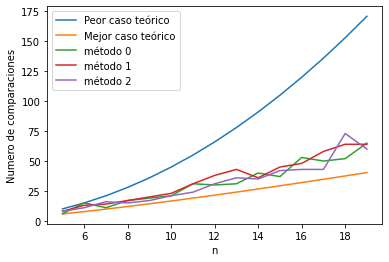

In [34]:
import matplotlib.pyplot as plt
import math
import random

start,stop = 5,20
x=[n for n in range(start,stop)] 
t1=[((n-1)*(n)/2) for n in range(start,stop)]; 
t2=[(((n)*math.log2(n))/2) for n in range(start,stop)];
y0=[];
y1=[];
y2=[];
y3=[];

for n in range(start,stop):

  a = random.sample(range(1, 300), n) #Arreglo de entrada aleatoria
  b = a.copy()
  c = a.copy()

  comparaciones = 0
  QuickSort(a,0,len(a),0)
  y0.append(comparaciones)

  comparaciones = 0
  QuickSort(b,0,len(b),1)
  y1.append(comparaciones)

  comparaciones = 0
  QuickSort(c,0,len(c),2)
  y2.append(comparaciones)



plt.plot(x,t1)
plt.plot(x,t2)  
plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(['Peor caso teórico','Mejor caso teórico', 'método 0', 'método 1', 'método 2'])

plt.xlabel('n')
plt.ylabel('Numero de comparaciones')
plt.show()

##Análisis de Resultados 
Como se puede ver en el gráfico, los tres métodos se mantuvieron bastánte cercanos al comportamiento del mejor caso, ya que el peor caso sólo ocurre cuando se tiene un arreglo ordenado y no se elige pivote aleatorio.

Por ende, para casos generales, se confirma QuickSort tiene un tiempo de ejecución $O(nlogn)$

##6.2 QuickSort VS MergeSort

Sabemos que tanto **MergeSort** como **QuickSort** tienen un tiempo de ejecución $o(nlogn)$, con **MergeSort** siendo más estricto en este caso. Pero la implementación de estos algoritmos es bastante distinta, con **QuickSort** siendo mucho más simple. A continuación se realizarán experimentos para comparar el tiempo real de estos algoritmos, usando los distintos medios de selección de pivote.



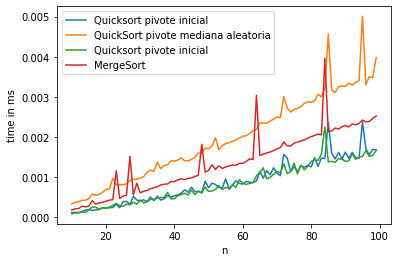

In [40]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def merge(array, start, mid, end):
    aux = []
    a = start 
    b = mid 
    while (True):

        if (array[a] <= array[b]): 
            aux.append(array[a])
            a+=1
        if (array[b] < array[a]):
            aux.append(array[b])
            b+=1

        if (a == mid): 
            while(b != end): 
                aux.append(array[b])
                b+=1
            break 
        
        if (b == end):
            while (a != mid):
                aux.append(array[a])
                a+=1
            break
    
    for i in range(len(aux)): 
        array[start+i] = aux[i]

def MergeSort(array, start, end):
    if start>=end : 
      return 0
    mid = start + int((end-start)/2)
    if mid==start:
      return 0
    MergeSort(array,start,mid,)
    MergeSort(array,mid,end)
    merge(array,start,mid,end)
    return 
  
x=[] 
y0=[]
y1=[]
y2=[]
y3=[]

for n in range(10,100):

  a = random.sample(range(1, 1000), n) 
  b = a.copy()
  c = a.copy()
  d = a.copy() 
  t0 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({a},{0},{len(a)},{0})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({b},{0},{len(b)},{1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({c},{0},{len(c)},{2})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({d},{0},{len(d)})", repeat=1, number=10)
  x.append(n)
  y0.append(t0)
  y1.append(t1)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Quicksort pivote inicial","QuickSort pivote mediana aleatoria", "Quicksort pivote inicial","MergeSort"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Análisis de Resultados
Como se puede apreciar en el gráfico, los **QuickSorts** realizados con pivote escogido al inicio y final son más rapidos que **MergeSort**, mientras que el **QuickSort** con pivote mediana de muestra aleatoria es más lento. En este caso, los costos asociados a muestrear el arreglo y realizar comparaciones extra son mayores a lo que se gana con tener un pivote más cercano a la mediana real.

##6.3. Entrada casi ordenada

Sabemos que el peor caso es cuando el arreglo está ordenado. ¿Cómo se comportan los distintos métodos de **Partition** en **QuickSort** cuando el arreglo está casi ordenado?

Para obtener al arreglo casi ordenado, primero usamos QuickSort para generar un arreglo ordenado. Luego, elegimos tres elementos al azar y los intercambiamos de posición. Finalmente se copia el arreglo para usarlo con los distintos métodos.

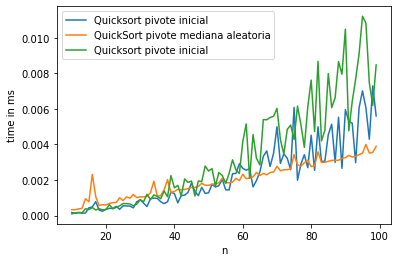

In [43]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[] 
y0=[]
y1=[]
y2=[]


for n in range(10,100):

  a = random.sample(range(1, 1000), n) 
  QuickSort(a,0,len(a),2)
  m1,m2,m3 = random.sample(range(1,n),3)

  a[m1],a[m2],a[m3]=a[m2],a[m3],a[m1]

  b = a.copy()
  c = a.copy()
  t0 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({a},{0},{len(a)},{0})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({b},{0},{len(b)},{1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import QuickSort", stmt=f"QuickSort({c},{0},{len(c)},{2})", repeat=1, number=10)
  x.append(n)
  y0.append(t0)
  y1.append(t1)
  y2.append(t2)


plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Quicksort pivote inicial","QuickSort pivote mediana aleatoria", "Quicksort pivote inicial"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Análisis de Resultados

Con el arreglo casi ordenado, podemos ver que los casos con pivote inicial y final ya no son tán efectivos como antes. En unos pocos casos son mejores al **QuickSort** con mediana aleatoria, pero el resto de las veces se demoran más, acercándose al tiempo de peor caso, $O(n^2)$